/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canva

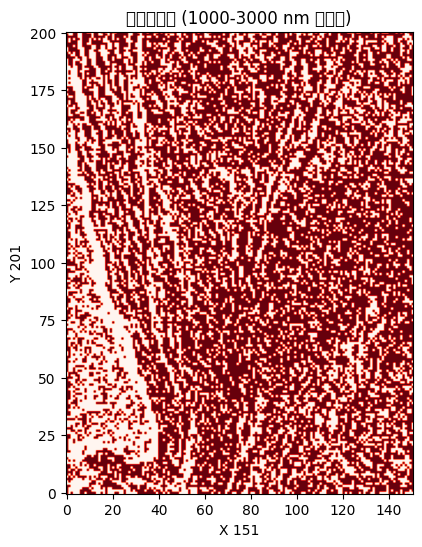

In [27]:
import numpy as np
from my_func.Read_ibw import read_ibw
import matplotlib.pyplot as plt

imchi3_data = read_ibw('/Users/ootahiroki/Library/CloudStorage/Box-Box/KanoLab/Raman/data/1008H38_151_201_imchi3_dataOrig.ibw')
# 波長軸を最後の次元に移動
imchi3_data = np.moveaxis(imchi3_data, 0, -1)  # 新しい形状: (151, 201, 1, 1148)

wavelengths = read_ibw('/Users/ootahiroki/Library/CloudStorage/Box-Box/KanoLab/Raman/data/1008H38_151_201_re_ramanshift2.ibw')


min_wavelength = 1000  # 最小波長（nm）
max_wavelength = 3000  # 最大波長（nm）


# 波長範囲に対応するインデックスを取得
wavelength_indices = np.where((wavelengths >= min_wavelength) & (wavelengths <= max_wavelength))[0]

# 強度の総和を計算（指定した波長範囲のみ）
intensity_sum = np.sum(imchi3_data[:, :, :, wavelength_indices], axis=-1) 

# 4. 閾値に基づくマスクの作成
threshold = 0  # データに応じて調整
mask = intensity_sum > threshold  # 形状: (151, 201, 1)

# マスクの形状を調整（z 軸を除去して2次元に）
if mask.shape[-1] == 1:
    mask_2d = mask[:, :, 0]
else:
    mask_2d = mask

# マスク結果の表示
cmap = plt.cm.get_cmap('Reds')
plt.figure(figsize=(8, 6))
plt.imshow(mask_2d.T, cmap=cmap, origin='lower')
plt.title(f'マスク結果 ({min_wavelength}-{max_wavelength} nm の範囲)')
plt.xlabel('X 151')
plt.ylabel('Y 201')
plt.show()


In [28]:
print('imchi3_data.shape:', imchi3_data.shape)  # 期待される形状: (151, 201, 1, 1148)
print('mask.shape:', mask.shape)                # 期待される形状: (151, 201, 1)

# データを (ピクセル数, 波長数) にフラット化
data_flat = imchi3_data.reshape(-1, imchi3_data.shape[-1])  # 形状: (151*201*1, 1148)

# マスクをフラット化
mask_flat = mask.reshape(-1)  # 形状: (151*201*1,)

# マスクを適用して赤の点のデータを取得
cell_data = data_flat[mask_flat]  # 形状: (赤の点の数, 1148)




imchi3_data.shape: (151, 201, 1, 1148)
mask.shape: (151, 201, 1)


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データの標準化
scaler = StandardScaler()
cell_data_scaled = scaler.fit_transform(cell_data)

# 主成分数
n_components = 10
pca = PCA(n_components=n_components)
cell_data_pca = pca.fit_transform(cell_data_scaled)


/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from c

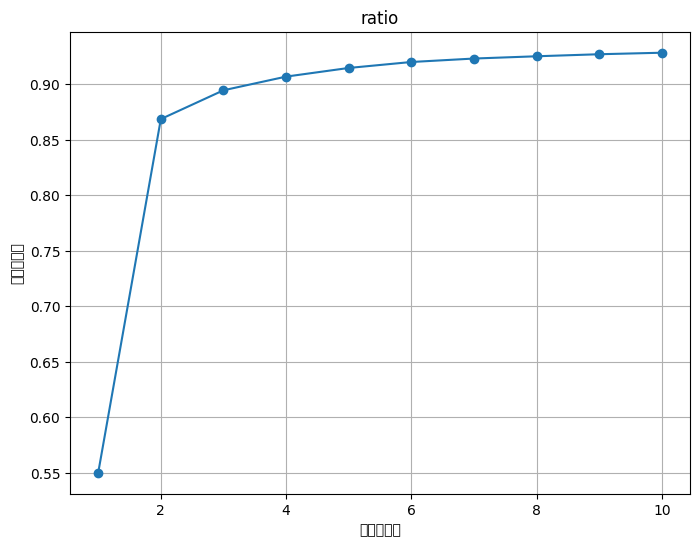

In [30]:
# 累積寄与率の計算
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 寄与率のプロット
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('主成分の数')
plt.ylabel('累積寄与率')
plt.title('ratio')
plt.grid(True)
plt.show()


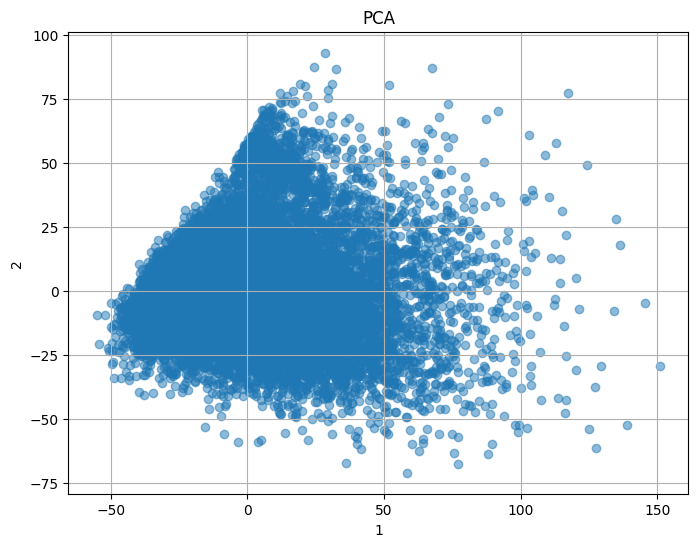

In [31]:
# 主成分1と主成分2のスコアを散布図で表示
plt.figure(figsize=(8, 6))
plt.scatter(cell_data_pca[:, 0], cell_data_pca[:, 1], alpha=0.5)
plt.xlabel('1')
plt.ylabel('2')
plt.title('PCA')
plt.grid(True)
plt.show()
